In [42]:
from bs4  import BeautifulSoup
from urllib.request import urlopen,Request
link="https://www.flipkart.com/musical-instruments/pr?sid=ypu&marketplace=FLIPKART&p%5B%5D=facets.rating%255B%255D%3D4%25E2%2598%2585%2B%2526%2Babove&param=567890"
url=Request(link)
content=urlopen(url).read()
soup=BeautifulSoup(content,"html.parser")
print(soup.title.text)

Buy Musical Instruments at Best Prices Online | Flipkart.com


In [43]:
containers=soup.find_all("div",{"class":"slAVV4"})
print(len(containers))

40


In [44]:
container=containers[0]

In [116]:
product_name=[]
price=[]
rating=[]
offer=[]
#review=[]
for container in containers:
    product=container.div.img["alt"]
    product_name.append(product)
    pricing=container.findAll("div",{"class":"Nx9bqj"})
    price.append(pricing[0].text)
    ratings=container.findAll("div",{"class":"XQDdHH"})
    rating.append(ratings[0].text)
    offering=container.findAll("div",{"class":"UkUFwK"})
    offer.append(offering[0].text)
    #reviewing=container.findAll("div",{"class":"Wphh3N"})
    #review.append(reviewing[0].text)
    #trim_price=" ".join(price.split("₹"))
    #rm=trim_price.split("₹")
    #add_rs="Rs"+rm[1]
    #split=add_rs.split("E")
    #final_price=split[0]
print(f"{len(price)}")


40


In [53]:
import pandas as pd
df=pd.DataFrame({
    "productname":product_name,
    "pricing":price,
    "ratings":rating,
    "offer(%)":offer
})

In [ ]:
df["pricing"]=df["pricing"].str.replace("₹","")
df["pricing"]=df["pricing"].str.replace(",","")
df["pricing"]=df["pricing"].str.astype("int")
df["ratings"]=df["ratings"].str.astype("float")

In [100]:
df.head()

,productname,pricing,ratings,offer(%)
0,Radhe Flutes C Natural Bansuri Right Hand Midd...,326,4.2,59% off
1,AMG Music Acoustic Full Light String Set 6 WIT...,179,4.0,74% off
2,intern INT-38C-BK Acoustic Guitar Linden Wood ...,1623,4.0,75% off
3,REVEL RVL-38C-LGP-BK Acoustic Guitar Linden Wo...,1509,4.1,76% off
4,"Digimore 10W Voice Amplifier w BT, Head Mic, T...",1249,4.3,58% off


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productname  40 non-null     object 
 1   pricing      40 non-null     int32  
 2   ratings      40 non-null     float64
 3   offer        40 non-null     object 
dtypes: float64(1), int32(1), object(2)
memory usage: 1.2+ KB


In [101]:
df.to_csv("music_instrument.csv")

In [105]:
df=df.rename(columns={"offer(%)":"offer"})

In [107]:
df.head()

,productname,pricing,ratings,offer
0,Radhe Flutes C Natural Bansuri Right Hand Midd...,326,4.2,59% off
1,AMG Music Acoustic Full Light String Set 6 WIT...,179,4.0,74% off
2,intern INT-38C-BK Acoustic Guitar Linden Wood ...,1623,4.0,75% off
3,REVEL RVL-38C-LGP-BK Acoustic Guitar Linden Wo...,1509,4.1,76% off
4,"Digimore 10W Voice Amplifier w BT, Head Mic, T...",1249,4.3,58% off


In [112]:
df["offer"]=df["offer"].str.replace("% off","")
df["offer"]=df["offer"].astype("int")

In [109]:
df.head()

,productname,pricing,ratings,offer
0,Radhe Flutes C Natural Bansuri Right Hand Midd...,326,4.2,59
1,AMG Music Acoustic Full Light String Set 6 WIT...,179,4.0,74
2,intern INT-38C-BK Acoustic Guitar Linden Wood ...,1623,4.0,75
3,REVEL RVL-38C-LGP-BK Acoustic Guitar Linden Wo...,1509,4.1,76
4,"Digimore 10W Voice Amplifier w BT, Head Mic, T...",1249,4.3,58


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productname  40 non-null     object 
 1   pricing      40 non-null     int32  
 2   ratings      40 non-null     float64
 3   offer        40 non-null     int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 1.1+ KB


<Axes: >

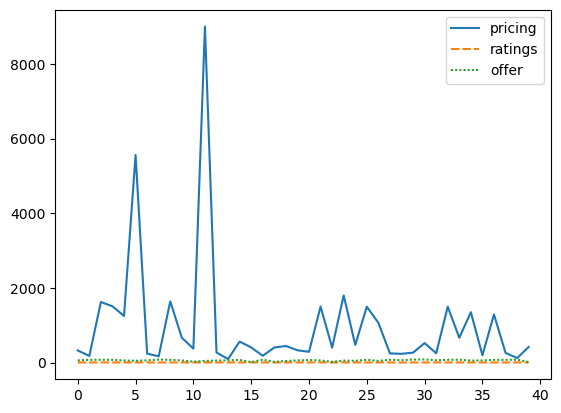

In [114]:
import seaborn as sns
sns.lineplot(df)

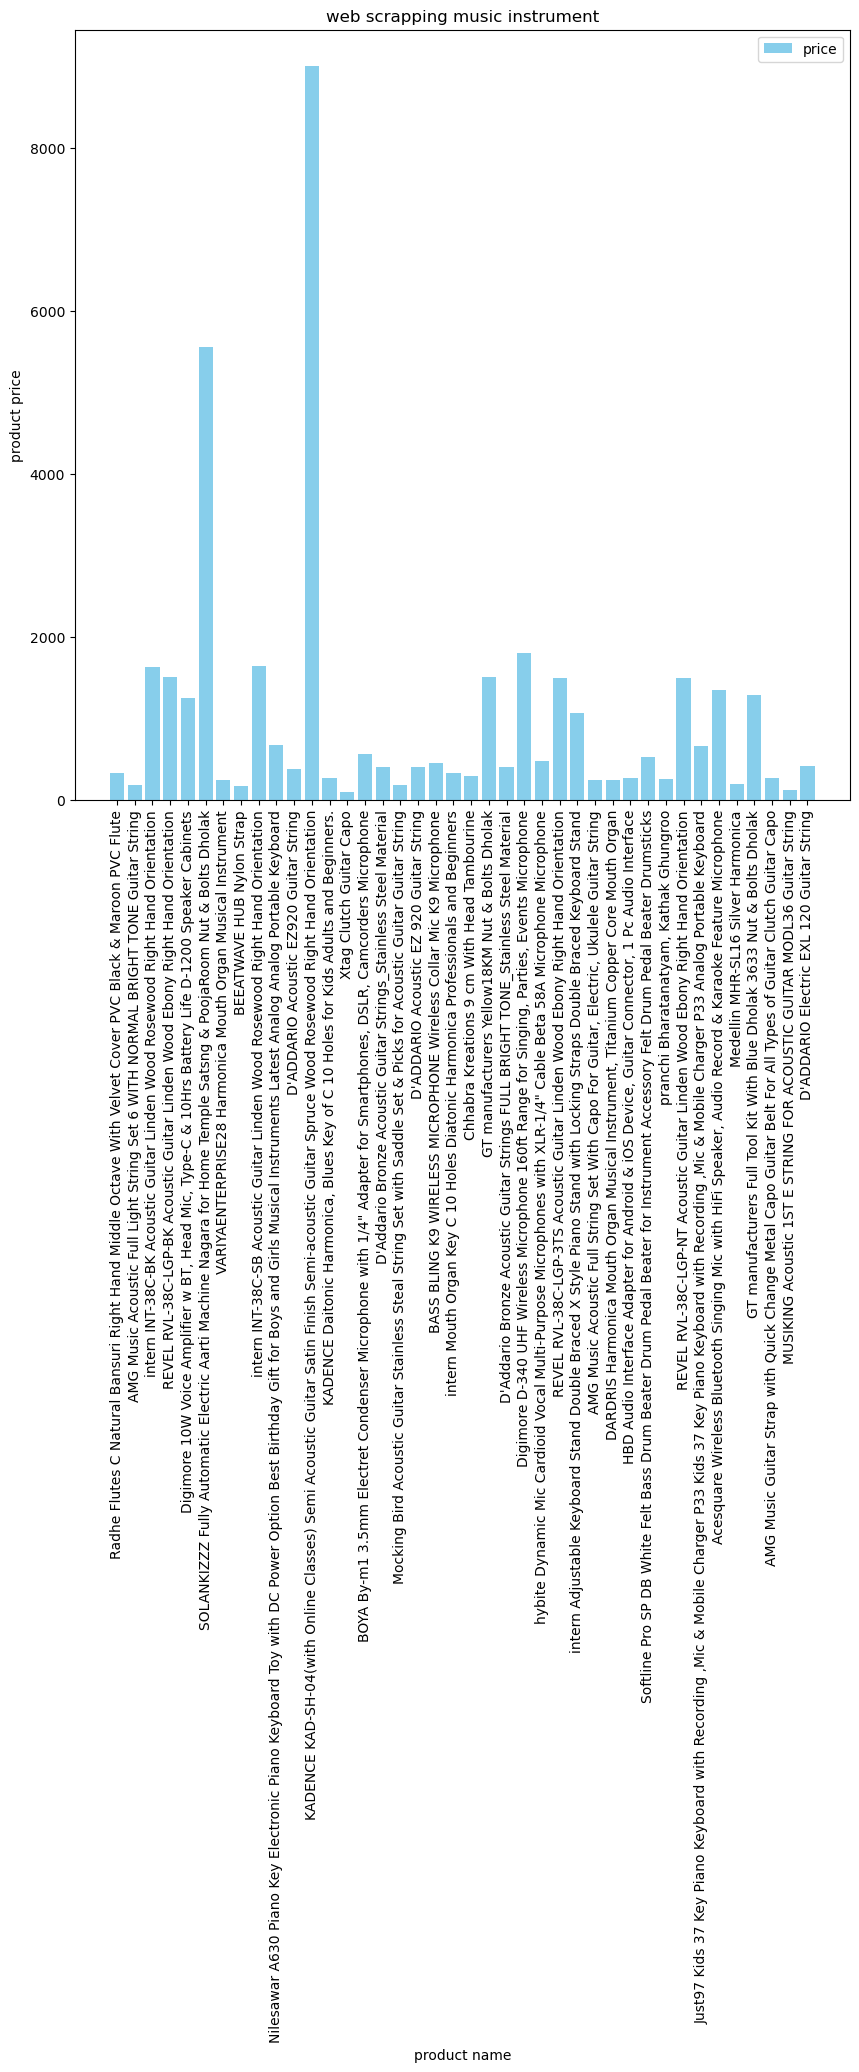

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
a=df["productname"]
b=df["pricing"]
c=df["ratings"]
d=df["offer"]
#x=np.arange(len(a))
#bar_width=0.4
plt.figure(figsize=(10,10))
plt.bar(a,b,label="price",color="skyblue")
#plt.bar(a,c,label="ratings",color="orange")
#plt.bar(a,d,label="offer",color="purple")
plt.xticks(x,a,rotation=90)
plt.xlabel("product name")
plt.ylabel("product price")
plt.title("web scrapping music instrument")
plt.legend()
plt.show()

Text(0.5, 1.0, 'web scrapping music instrument')

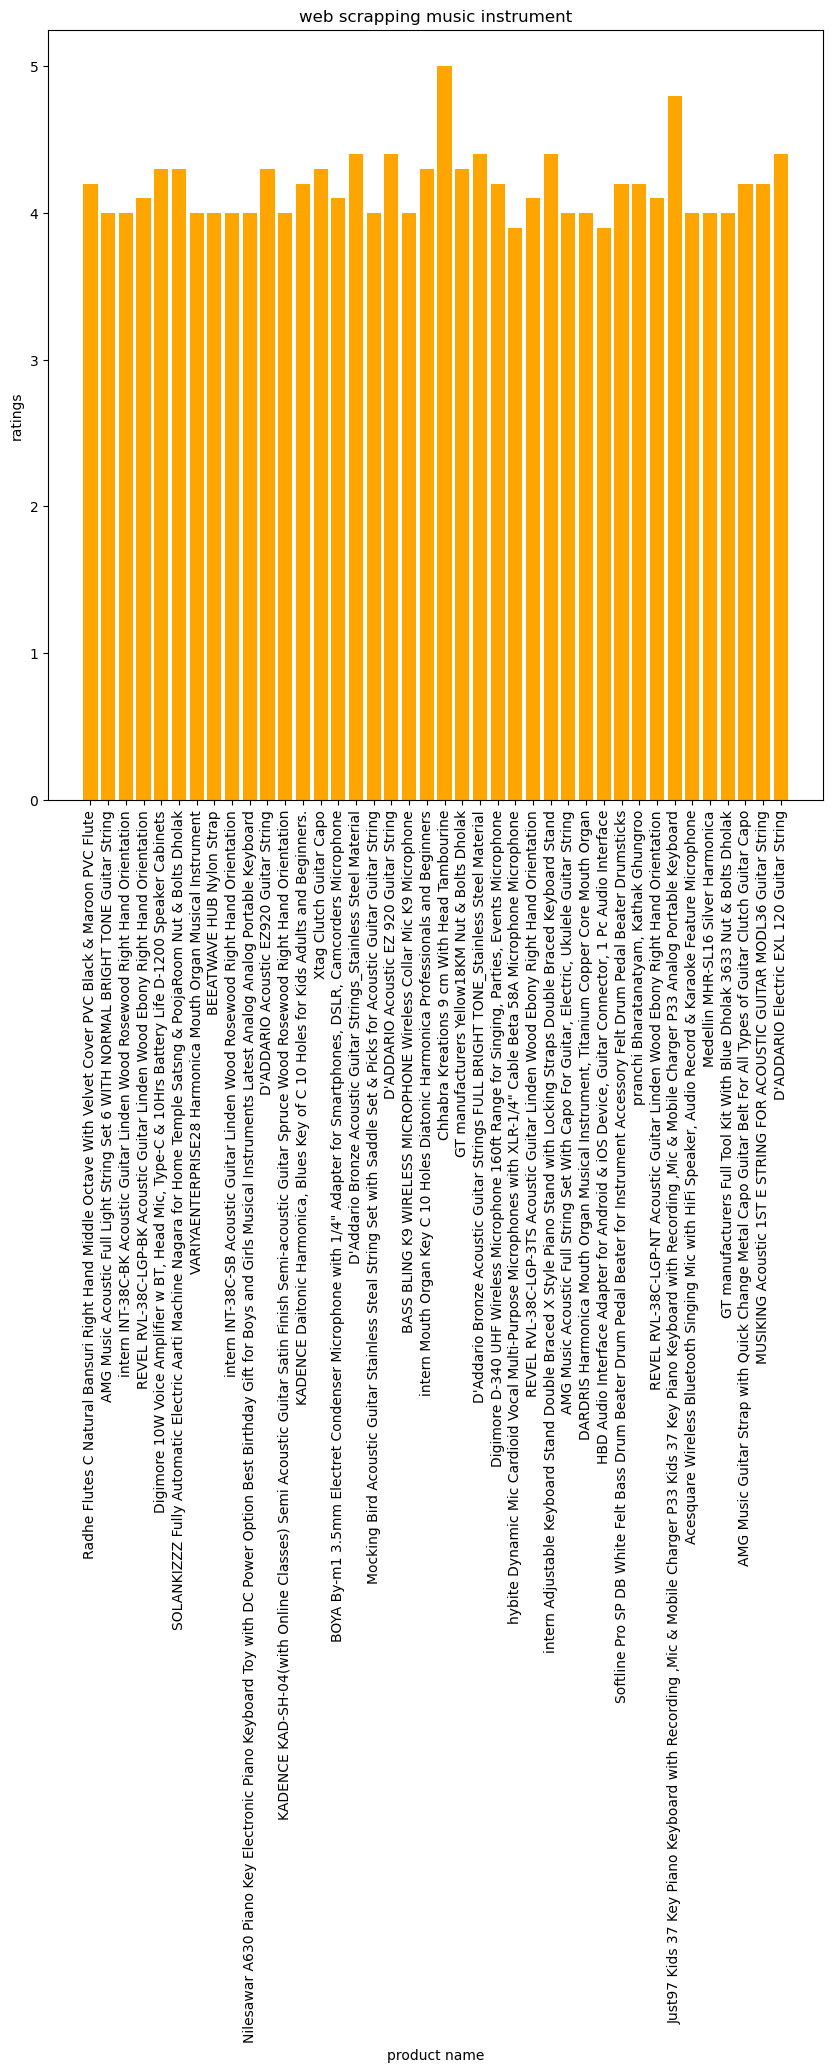

In [130]:
plt.figure(figsize=(10,10))
plt.bar(a,c,label="ratings",color="orange")
plt.xticks(x,a,rotation=90)
plt.xlabel("product name")
plt.ylabel("ratings")
plt.title("web scrapping music instrument")

Text(0.5, 1.0, 'web scrapping music instrument')

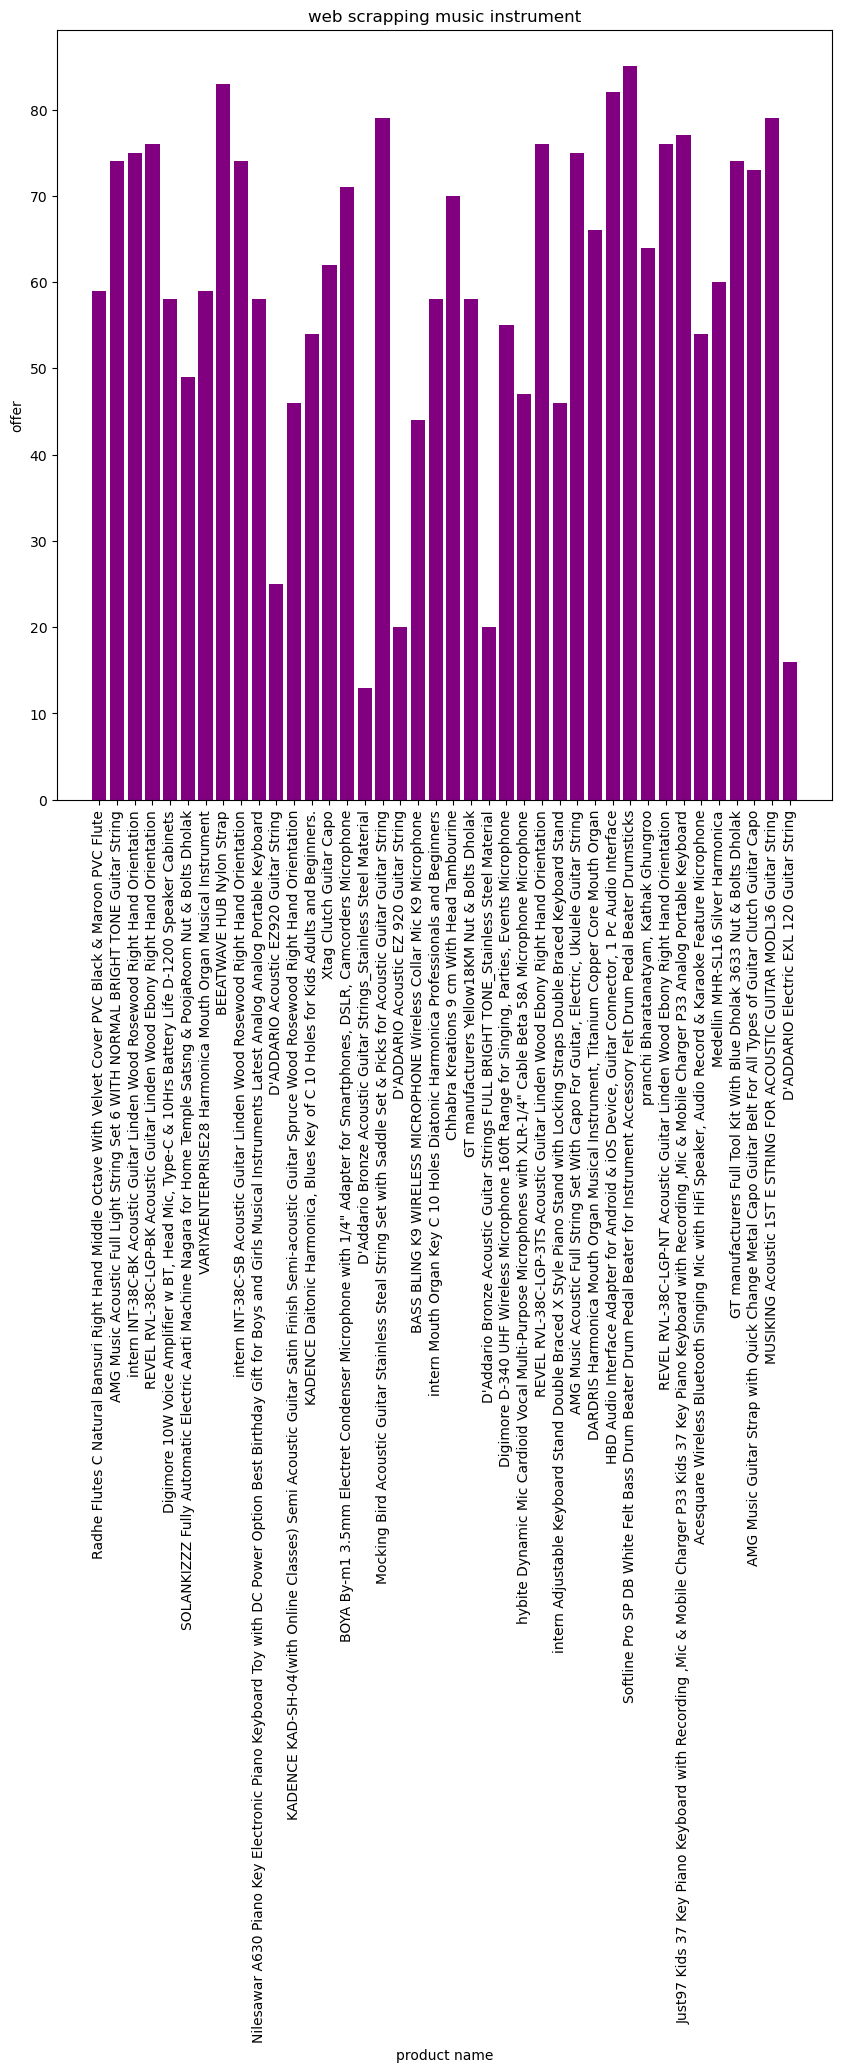

In [129]:
plt.figure(figsize=(10,10))
plt.bar(a,d,label="offer",color="purple")
plt.xticks(x,a,rotation=90)
plt.xlabel("product name")
plt.ylabel("offer")
plt.title("web scrapping music instrument")